In [46]:
import pandas as pd
# Tampilkan semua kolom dan baris
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [47]:
df = pd.read_csv("./data.csv")

In [48]:
df_clean = df.drop(columns=["no", "status", "keterangan", "waktu"]).dropna()

In [49]:
df_clean.sample(5)

,tanggal,isolat,u,diameter_1,diameter_2,diameter_3,diameter_4
256,8/3/2025,FK-5,2.0,55.2,44.1,40.5,48.5
262,8/3/2025,FK-6,3.0,42.4,44.0,42.7,42.1
184,8/1/2025,FK-5,5.0,31.2,33.4,31.0,30.0
176,8/1/2025,FK-4,2.0,31.7,33.0,32.1,32.2
58,7/30/2025,FK-5,4.0,24.6,18.2,18.7,24.5


In [50]:
df_melted = df_clean.melt(
    id_vars=["tanggal", "isolat", "u"], 
    value_vars=["diameter_1", "diameter_2", "diameter_3", "diameter_4"],
    var_name="diameter_n",
    value_name="diameter")

df_melted.sample(5)

,tanggal,isolat,u,diameter_n,diameter
647,7/29/2025,FK-5,5.0,diameter_3,8.7
119,7/31/2025,FP-1,5.0,diameter_1,7.0
445,7/31/2025,FP-5,2.0,diameter_2,23.3
836,8/2/2025,FK-5,5.0,diameter_3,38.4
242,8/3/2025,FK-1,4.0,diameter_1,61.5


In [51]:
df_melted.groupby(
    by=["isolat", "tanggal"]).agg({
        "diameter": "mean"
    })

diameter
isolat tanggal            
FK-1   7/29/2025     5.190
       7/30/2025    16.435
       7/31/2025    27.750
       8/1/2025     37.270
       8/2/2025     48.720
       8/3/2025     57.120
       8/4/2025     62.190
FK-3   7/29/2025     5.070
       7/30/2025    15.065
       7/31/2025    26.835
       8/1/2025     37.125
       8/2/2025     50.625
       8/3/2025     53.785
       8/4/2025     52.855
FK-4   7/29/2025     4.510
       7/30/2025    10.800
       7/31/2025    25.030
       8/1/2025     32.560
       8/2/2025     39.275
       8/3/2025     46.640
       8/4/2025     49.430
FK-5   7/29/2025     7.350
       7/30/2025    16.325
       7/31/2025    24.260
       8/1/2025     31.735
       8/2/2025     39.820
       8/3/2025     48.770
       8/4/2025     53.565
FK-6   7/30/2025     5.385
       7/31/2025    14.540
       8/1/2025     23.005
       8/2/2025     33.805
       8/3/2025     40.320
       8/4/2025     50.945
FP-1   7/29/2025     5.340
       7/30/2025    14.395
       7/31/2025    23.635
       8/1/2025     29.440
       8/2/2025     42.435
       8/3/2025     50.835
FP-2   7/29/2025     4.330
       7/30/2025    13.540
       7/31/2025    26.145
       8/1/2025     33.225
       8/2/2025     41.425
       8/3/2025     49.235
FP-3   7/29/2025     4.455
       7/30/2025    17.905
       7/31/2025    27.845
       8/1/2025     35.530
       8/2/2025     47.000
       8/3/2025     52.925
FP-5   7/29/2025     3.825
       7/30/2025    14.470
       7/31/2025    24.025
       8/1/2025     27.985
       8/2/2025     38.640
       8/3/2025     43.870
FP-6   7/30/2025     5.950
       7/31/2025    15.205
       8/1/2025     20.540
       8/2/2025     31.185
       8/3/2025     39.960

In [ ]:
df_final = df_melted.groupby(
        by=["isolat","tanggal",],
    ).agg({
        "diameter": "mean"
    }).reset_index()

df_final.sample(5)

,isolat,tanggal,diameter
21,FK-5,7/29/2025,7.35
53,FP-5,7/30/2025,14.47
7,FK-3,7/29/2025,5.07
2,FK-1,7/31/2025,27.75
60,FP-6,8/1/2025,20.54


In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

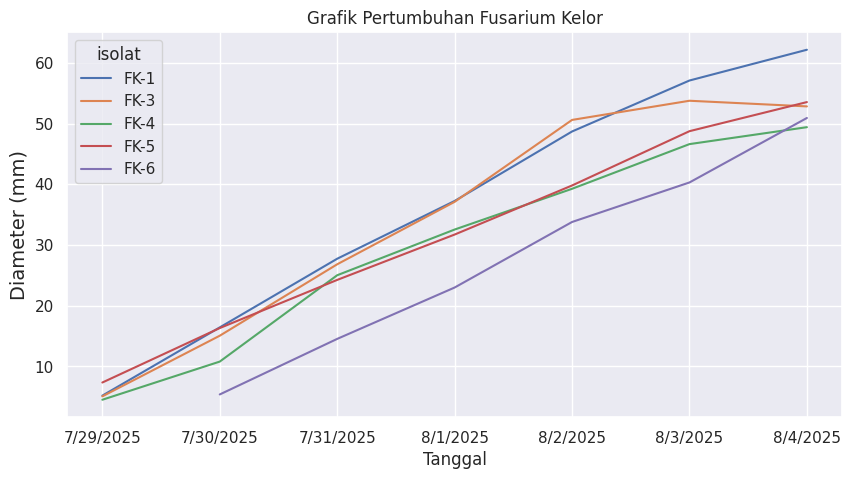

In [74]:
plt.figure(figsize=(10, 5))

plt.title("Grafik Pertumbuhan Fusarium Kelor")
plt.xlabel("Tanggal")
plt.ylabel("Diameter (mm)", size=14)
sns.set_theme("notebook")
sns.lineplot(data=df_final,
    x="tanggal", 
    y="diameter",
    hue="isolat",
    hue_order=["FK-1", "FK-3", "FK-4", "FK-5", "FK-6"])

plt.show()

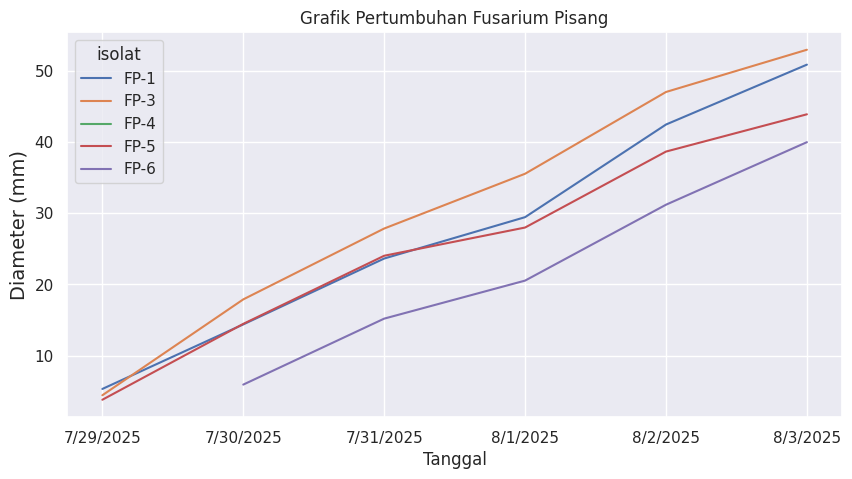

In [75]:
plt.figure(figsize=(10, 5))

plt.title("Grafik Pertumbuhan Fusarium Pisang")
plt.xlabel("Tanggal")
plt.ylabel("Diameter (mm)", size=14)
sns.set_theme("notebook")
sns.lineplot(data=df_final,
    x="tanggal", 
    y="diameter",
    hue="isolat",
    hue_order=["FP-1", "FP-3", "FP-4", "FP-5", "FP-6"])

plt.show()